In [ ]:
# Mounting the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing the Loan Prediction Dataset:

In [ ]:
ss=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/Skyserver.csv')

Identification of data types:

In [ ]:
ss.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

Size of the dataset:

In [ ]:
ss.shape

(10000, 18)

Statistical Summary of Numeric Variables:

In [ ]:
ss.describe

<bound method NDFrame.describe of              objid          ra        dec  ...  plate    mjd  fiberid
0     1.237650e+18  183.531326   0.089693  ...   3306  54922      491
1     1.237650e+18  183.598371   0.135285  ...    323  51615      541
2     1.237650e+18  183.680207   0.126185  ...    287  52023      513
3     1.237650e+18  183.870529   0.049911  ...   3306  54922      510
4     1.237650e+18  183.883288   0.102557  ...   3306  54922      512
...            ...         ...        ...  ...    ...    ...      ...
9995  1.237650e+18  131.316413  51.539547  ...    447  51877      246
9996  1.237650e+18  131.306083  51.671341  ...    447  51877      228
9997  1.237650e+18  131.552562  51.666986  ...   7303  57013      622
9998  1.237650e+18  131.477151  51.753068  ...    447  51877      229
9999  1.237650e+18  131.665012  51.805307  ...    447  51877      233

[10000 rows x 18 columns]>

In [ ]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Non-Graphical Univariate Analysis:

In [ ]:
#To get the count of unique values:

ss['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [ ]:
#To get list of unique values

ss['camcol'].unique()

array([4, 2, 1, 5, 6, 3])

In [ ]:
#To get the list & number of unique values:

ss['class'].nunique()

3

In [ ]:
#Finding null values

print(ss.isnull().sum(axis = 0))

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64


Graphical Univariate Analysis:

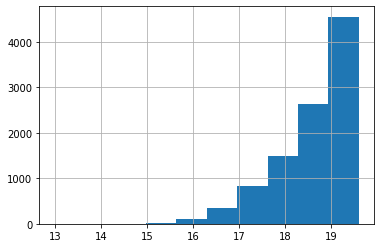

In [ ]:
#Histogram

ss['u'].hist(bins=10)

<Figure size 936x936 with 0 Axes>

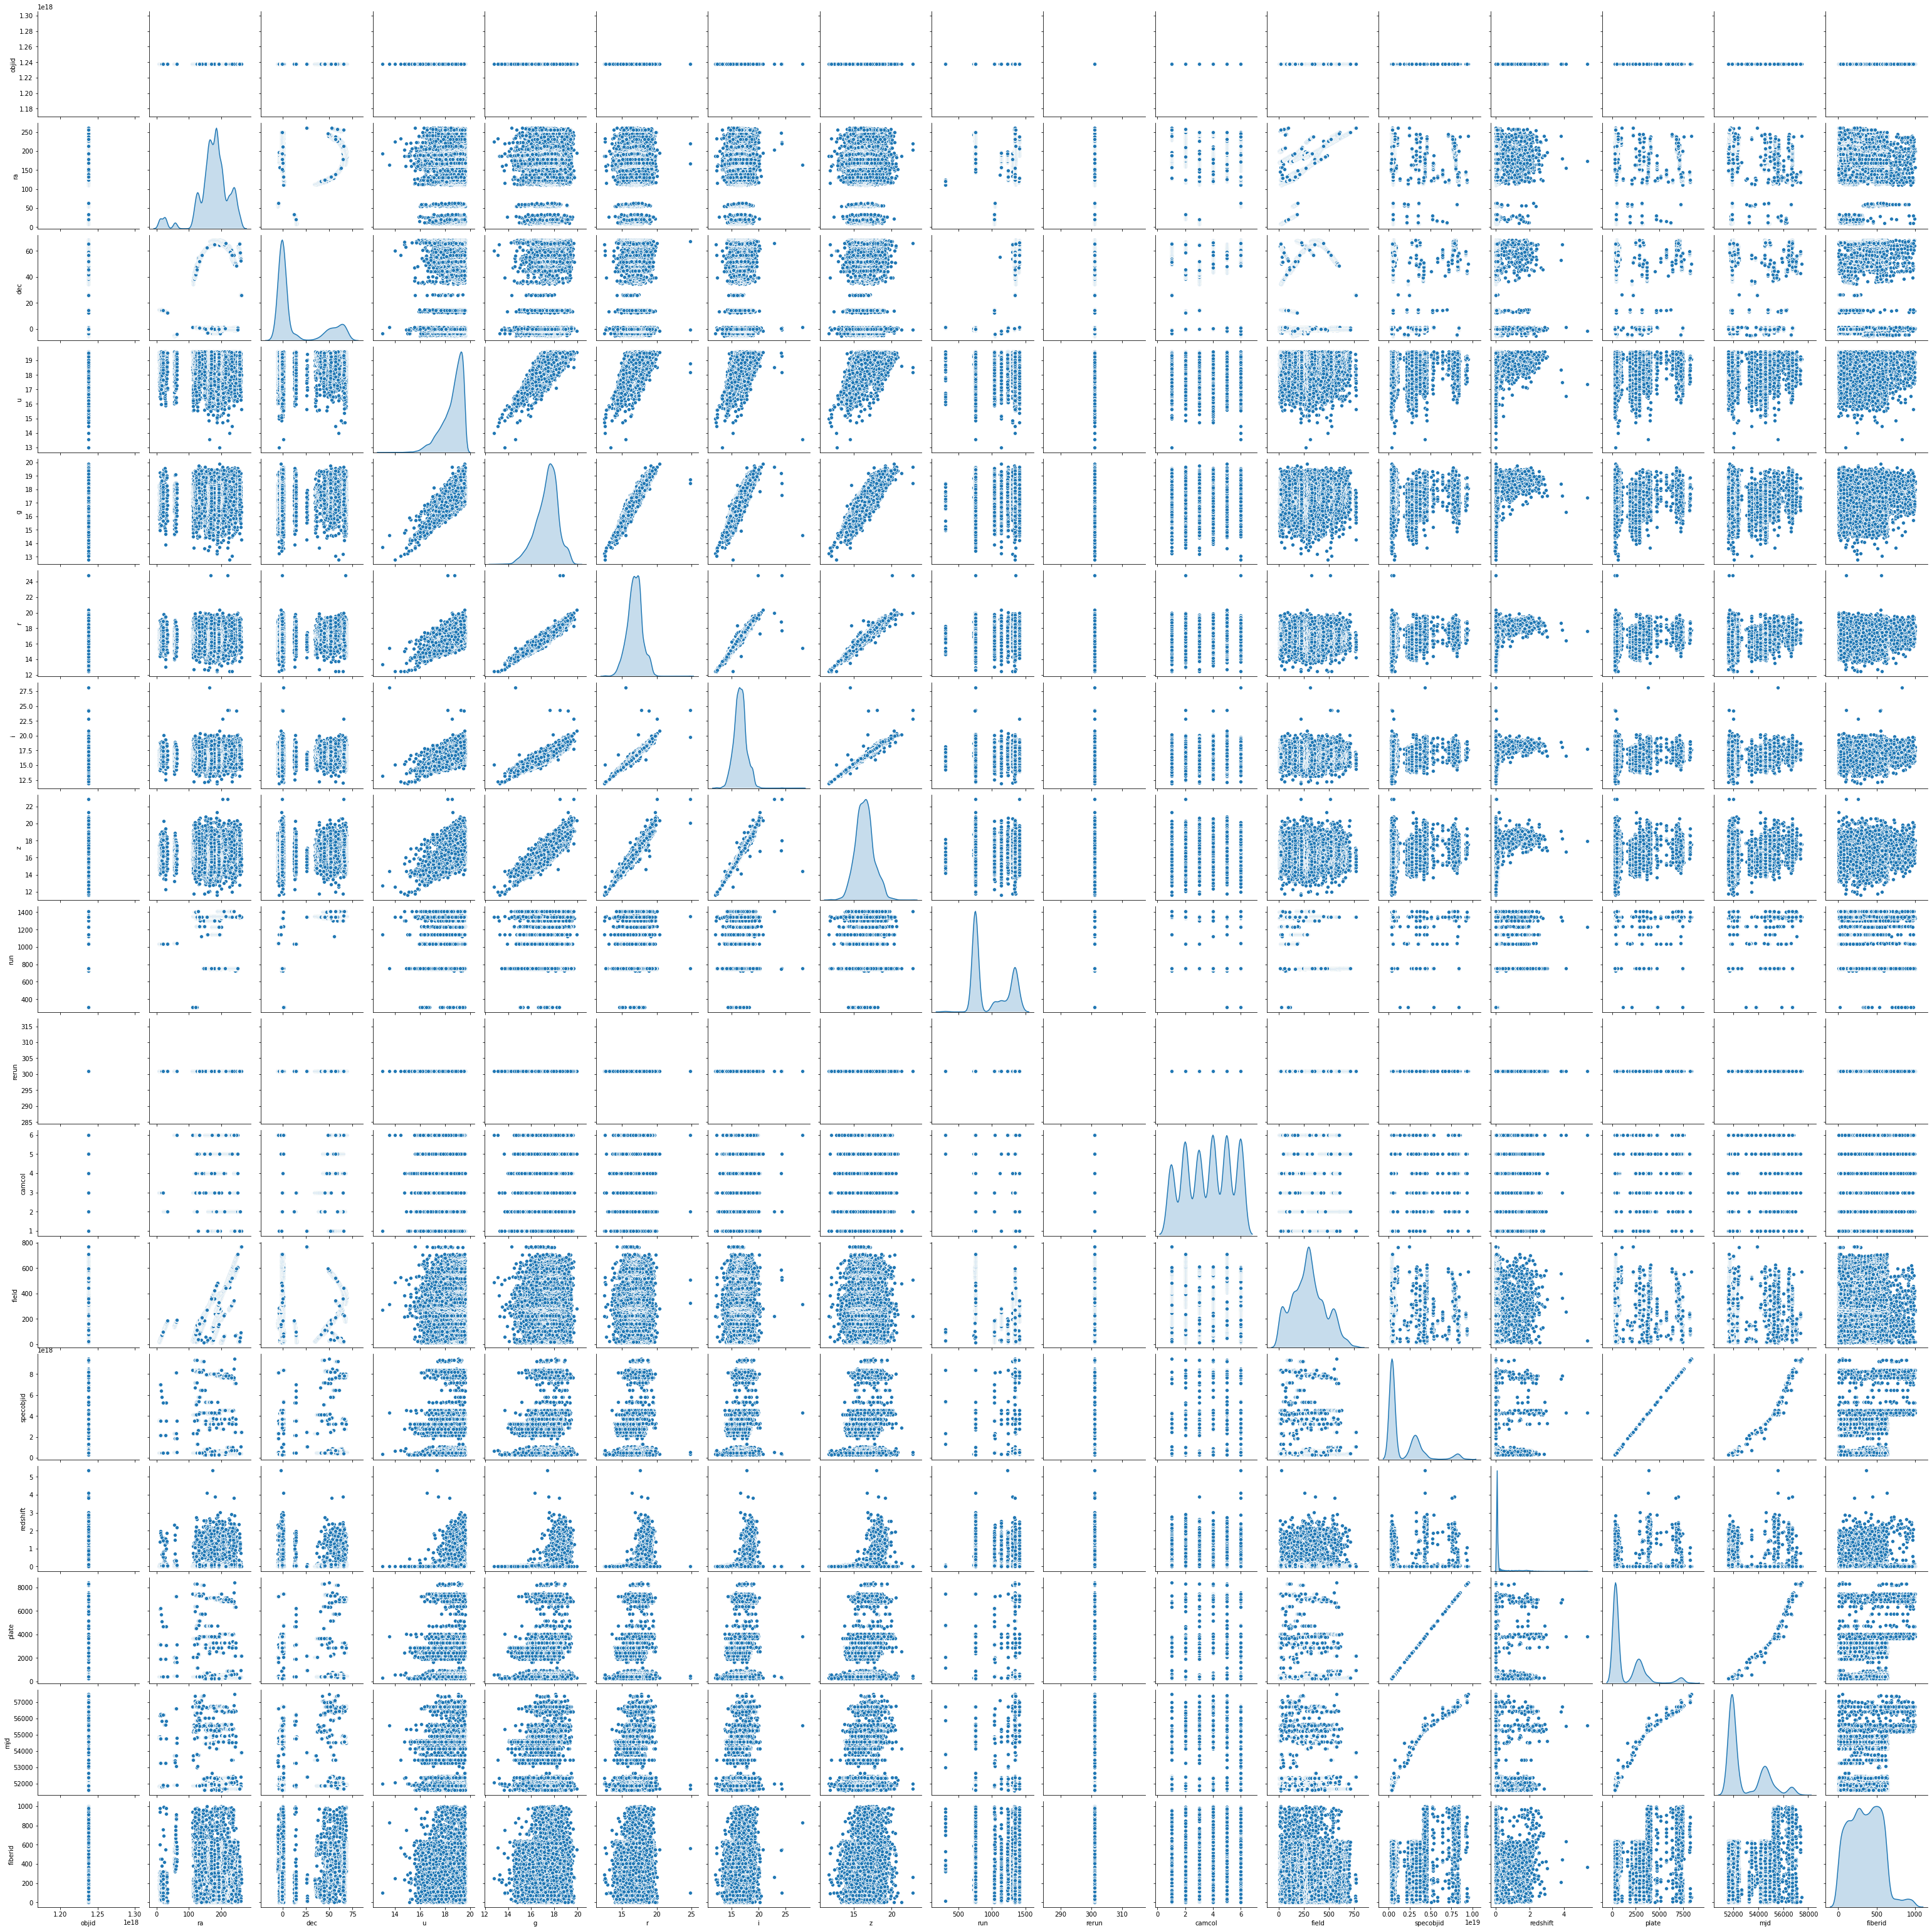

In [ ]:
plt.figure(figsize=[13,13])
sns.pairplot(ss,diag_kind='kde')

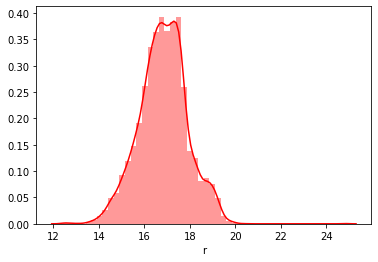

In [ ]:
#DistPlot

sns.distplot(ss[pd.notnull(ss.r)]['r'],color='red')

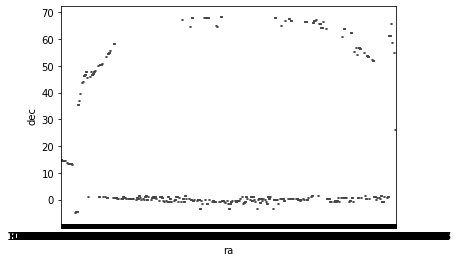

In [ ]:
#BoxPlot
#checking for outliers present in the dataset if any

sns.boxplot(x=ss['ra'],y=ss['dec'])

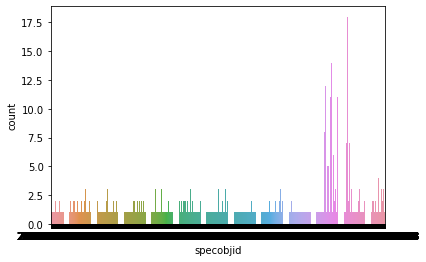

In [ ]:
#CountPlot
sns.countplot(ss.specobjid)

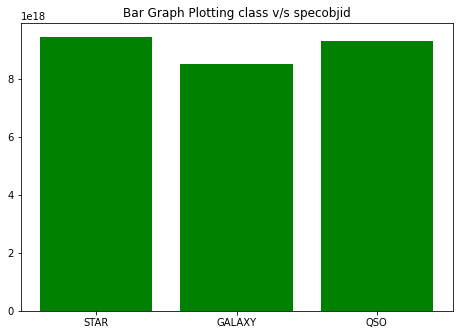

In [ ]:
#Bar Graph

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ss['class'],ss['specobjid'], color = 'g')
plt.title('Bar Graph Plotting class v/s specobjid')
plt.show()

In [ ]:
#checking for correaltion between variables

ss.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


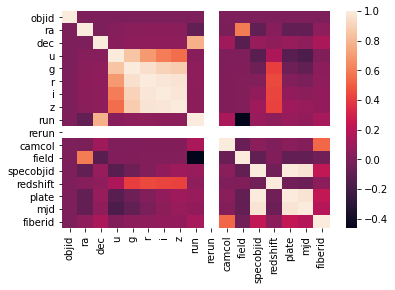

In [ ]:
#Checking correlation using Heatmap

sns.heatmap(ss.corr())

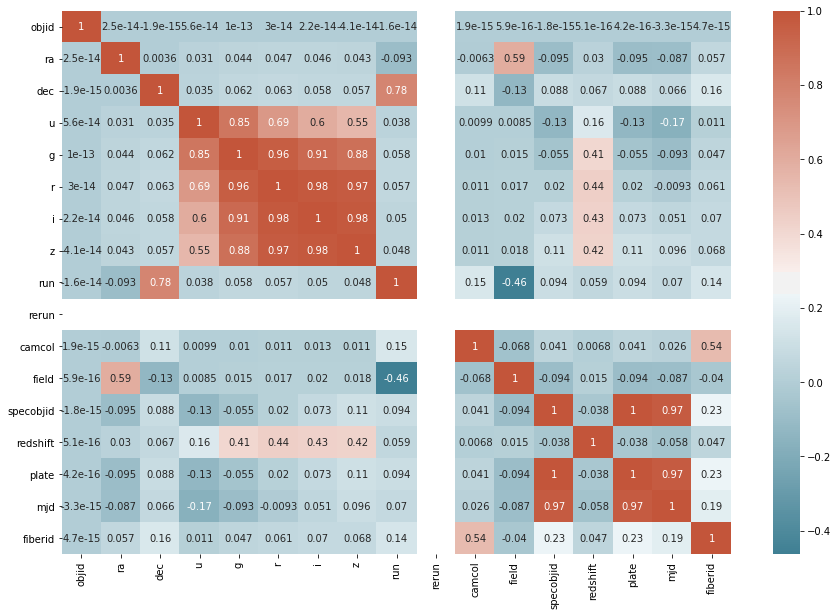

In [ ]:
corr = ss.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
#Checking the skewness

ss.skew()

objid        0.000000
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    1.794627
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [ ]:
#using label encoding and one-hot encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ss['u'] = le.fit_transform(ss['u'])
ss['r'] = le.fit_transform(ss['r'])
ss.head(5)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,8818,17.04240,1853,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,4066,17.21449,4220,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,8203,18.19169,7210,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,1569,16.60272,2431,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,1206,16.26342,3347,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [ ]:
#dummifying data required for spliting the data

ss = pd.get_dummies(ss)
ss.head(5)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,class_GALAXY,class_QSO,class_STAR
0,1.237650e+18,183.531326,0.089693,8818,17.04240,1853,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491,0,0,1
1,1.237650e+18,183.598371,0.135285,4066,17.21449,4220,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541,0,0,1
2,1.237650e+18,183.680207,0.126185,8203,18.19169,7210,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513,1,0,0
3,1.237650e+18,183.870529,0.049911,1569,16.60272,2431,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510,0,0,1
4,1.237650e+18,183.883288,0.102557,1206,16.26342,3347,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512,0,0,1


In [ ]:
#spliting the data

from sklearn.model_selection import train_test_split

y = ss['run']
X = ss

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [ ]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   objid         10000 non-null  float64
 1   ra            10000 non-null  float64
 2   dec           10000 non-null  float64
 3   u             10000 non-null  int64  
 4   g             10000 non-null  float64
 5   r             10000 non-null  int64  
 6   i             10000 non-null  float64
 7   z             10000 non-null  float64
 8   run           10000 non-null  int64  
 9   rerun         10000 non-null  int64  
 10  camcol        10000 non-null  int64  
 11  field         10000 non-null  int64  
 12  specobjid     10000 non-null  float64
 13  redshift      10000 non-null  float64
 14  plate         10000 non-null  int64  
 15  mjd           10000 non-null  int64  
 16  fiberid       10000 non-null  int64  
 17  class_GALAXY  10000 non-null  uint8  
 18  class_QSO     10000 non-nul

In [ ]:
#Using Decision Tree Model

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)
y_pred1 = dtree.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         308       1.00      1.00      1.00         7
         727       1.00      1.00      1.00         2
         745       1.00      1.00      1.00       101
         752       1.00      1.00      1.00       533
         756       1.00      1.00      1.00       794
        1035       1.00      1.00      1.00        91
        1045       1.00      1.00      1.00        29
        1119       0.00      0.00      0.00         1
        1140       0.99      1.00      1.00       137
        1231       1.00      1.00      1.00        60
        1239       1.00      1.00      1.00        51
        1302       1.00      0.98      0.99        62
        1331       0.98      1.00      0.99        57
        1334       1.00      1.00      1.00        59
        1336       1.00      1.00      1.00        53
        1345       1.00      1.00      1.00       219
        1350       1.00      1.00      1.00       117
        1356       1.00    

In [ ]:
#Applying Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         308       1.00      1.00      1.00         7
         727       0.00      0.00      0.00         2
         745       0.98      1.00      0.99       101
         752       1.00      1.00      1.00       533
         756       1.00      1.00      1.00       794
        1035       1.00      1.00      1.00        91
        1045       1.00      1.00      1.00        29
        1119       0.00      0.00      0.00         1
        1140       1.00      1.00      1.00       137
        1231       1.00      1.00      1.00        60
        1239       1.00      1.00      1.00        51
        1302       1.00      0.98      0.99        62
        1331       1.00      1.00      1.00        57
        1334       1.00      1.00      1.00        59
        1336       1.00      1.00      1.00        53
        1345       0.99      1.00      1.00       219
        1350       1.00      1.00      1.00       117
        1356       1.00    

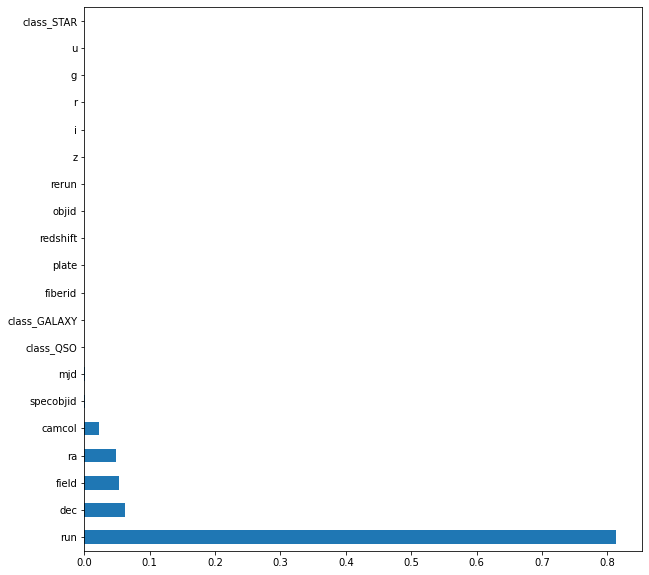

In [ ]:
# Normalize feature variables

from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

#Feature Importance using Random Forrest

firf = pd.Series(dtree.feature_importances_, index=X_features.columns)
firf.nlargest(25).plot(kind='barh',figsize=(10,10))

In [ ]:
# Function to calculate mean absolute error

def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_prediction = model.predict(X_test)
    model_crossV = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_crossV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn import model_selection

In [ ]:
dtree=DecisionTreeClassifier(criterion="entropy")
dtreeg=DecisionTreeClassifier(criterion='gini')
knn=KNeighborsClassifier()
gb=GaussianNB()
rfc=RandomForestClassifier(criterion='entropy')
rfcg=RandomForestClassifier(criterion='gini')
bgc=BaggingClassifier()
adb=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()
xgbrf=XGBRFClassifier()

In [ ]:
models = []
models.append(('Decision Tree',dtree))
models.append(('Decision Tree with Gini Coefficient',dtreeg))
models.append(('K Nearest Neighbors',knn))
models.append(('Naive Bayes',gb))
models.append(('Random Forrest',rfc))
models.append(('Random Forrest with Gini Coefficient',rfcg))
models.append(('Bagging Classifier',bgc))
models.append(('Ada Boost Classifier',adb))
models.append(('Gradient Boosting Classifier',gbc))
models.append(('XGB Classifier',xgb))
models.append(('XGBRF Classifier',xgbrf))

Decision Tree: 0.985200 (0.000414)
Decision Tree with Gini Coefficient: 0.988000 (0.000267)
K Nearest Neighbors: 0.776800 (0.004214)
Naive Bayes: 0.986800 (0.000256)
Random Forrest: 0.955400 (0.000846)
Random Forrest with Gini Coefficient: 0.972700 (0.000564)
Bagging Classifier: 0.986600 (0.000251)
Ada Boost Classifier: 0.716200 (0.022508)
Gradient Boosting Classifier: 0.977300 (0.000516)
XGB Classifier: 0.978800 (0.000544)
XGBRF Classifier: 0.977400 (0.000619)


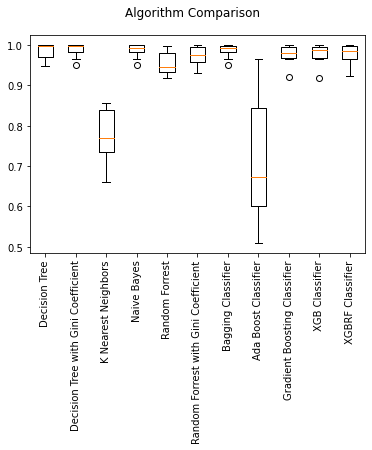

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=123)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks(rotation=90)
ax.set_xticklabels(names)
plt.show()